In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data = {'weather': ['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny','Rainy','Sunny','Overcast','Overcast','Rainy'],'temp': ['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild'],'play': ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']}

In [ ]:
df =  pd.DataFrame(data)

In [ ]:
df

,weather,temp,play
0,Sunny,Hot,No
1,Sunny,Hot,No
2,Overcast,Hot,Yes
3,Rainy,Mild,Yes
4,Rainy,Cool,Yes
5,Rainy,Cool,No
6,Overcast,Cool,Yes
7,Sunny,Mild,No
8,Sunny,Cool,Yes
9,Rainy,Mild,Yes


In [ ]:
y= df['play']
X= df.drop('play', axis=1)

In [ ]:
y

,weather,temp
0,0,0
1,0,0
2,2,0
3,1,1
4,1,2
5,1,2
6,2,2
7,0,1
8,0,2
9,1,1


In [ ]:
df.shape

(14, 3)

In [ ]:
# replacing values
df['weather'].replace(['Sunny', 'Rainy','Overcast'],
                        [0, 1,2], inplace=True)
df['temp'].replace(['Hot', 'Mild','Cool'],
                        [0, 1,2], inplace=True)
df['play'].replace(['Yes', 'No'],
                        [0, 1], inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


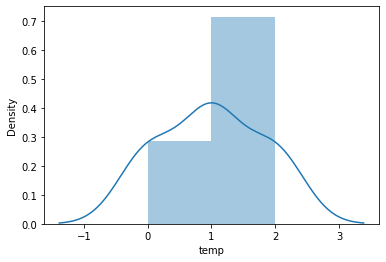

In [ ]:
import seaborn as sns
sns.distplot(df['temp'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


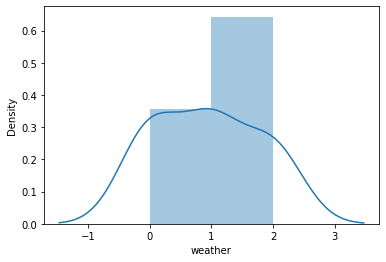

In [ ]:
sns.distplot(df['weather'])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train = scaler.fit_transform(X)

In [ ]:
train

array([[-1.16275535, -1.32287566],
       [-1.16275535, -1.32287566],
       [ 1.34164079, -1.32287566],
       [ 0.08944272,  0.        ],
       [ 0.08944272,  1.32287566],
       [ 0.08944272,  1.32287566],
       [ 1.34164079,  1.32287566],
       [-1.16275535,  0.        ],
       [-1.16275535,  1.32287566],
       [ 0.08944272,  0.        ],
       [-1.16275535,  0.        ],
       [ 1.34164079,  0.        ],
       [ 1.34164079, -1.32287566],
       [ 0.08944272,  0.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train,y,test_size=0.30)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
pred = gnb.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[3 0]
 [1 1]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



In [ ]:
gnb.score(X_test,y_test)

0.8